In [20]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\sheha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [21]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\sheha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


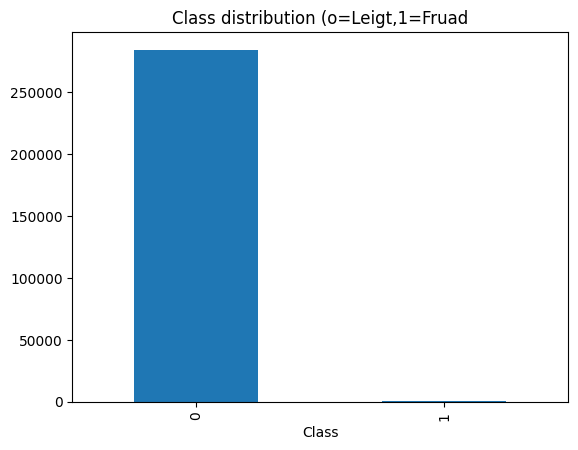

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datafile=pd.read_csv(r"E:\Github repo\Credit-Crad-Fraud-Detetction\data\creditcard.csv")
print (datafile.shape)
print(datafile['Class'].value_counts())

datafile['Class'].value_counts().plot(kind='bar')
plt.title("Class distribution (o=Leigt,1=Fruad")
plt.show()





In [23]:
!pip install scikit-learn
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\sheha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\sheha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


def load_data(path=r"E:\Github repo\Credit-Crad-Fraud-Detetction\data\creditcard.csv"):
    datafile=pd.read_csv(path)
    X=datafile.drop('Class',axis=1)
    y=datafile['Class']
    return X,y

def preprocess(X):
    X = X.copy()
    
    scaler_amount = StandardScaler()
    scaler_time = StandardScaler()
    
    X['Amount'] = scaler_amount.fit_transform(X['Amount'].values.reshape(-1, 1))
    X['Time']   = scaler_time.fit_transform(X['Time'].values.reshape(-1, 1))
    
    return X, scaler_amount,scaler_time


    
    

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X,y=load_data()
X,scaler_amount,scaler_time=preprocess(X)

X_train, X_test, y_train, y_test, =train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

print("Before:", y_train.value_counts().to_dict())
print("After:", pd.Series(y_train_res).value_counts().to_dict())



Before: {0: 227451, 1: 394}
After: {0: 227451, 1: 227451}


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rf.fit(X_train_res,y_train_res)

y_pred=rf.predict(X_test)
y_proba=rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.973103297664029
[[56849    15]
 [   16    82]]


In [29]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.1-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\sheha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_matric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_res,y_train_res)

y_pred_xgb=xgb.predict(X_test)
y_proba_xgb=xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:",roc_auc_score(y_test,y_proba_xgb))
    

C:\Users\sheha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:199: UserWarning: [17:10:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.87      0.71        98

    accuracy                           1.00     56962
   macro avg       0.80      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC: 0.9768807494860634
